In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# data
df_to_eda = pd.read_csv("data/curated/df_to_eda.csv")

In [7]:
# how much data we have on school_step
df_to_eda["school_step"].value_counts()

Médio & Pré-Vestibular    35307
Fundamental II            33390
Fundamental I             18144
Name: school_step, dtype: int64

Como podemos ver aqui, existe uma quantidade bem interessante entre as 3 classes que iremos prever. No FUND-I temos um pouco mais da metade das outras duas classes, mas acreditamos que não será um problema.

# Tamanho das sentenças

As questões vão de 2 à 52706 caracteres por questão
O valor mediano e médio de caracteres por questão é de 218 e de 395, respectivamente.


<AxesSubplot:xlabel='question_c6', ylabel='Count'>

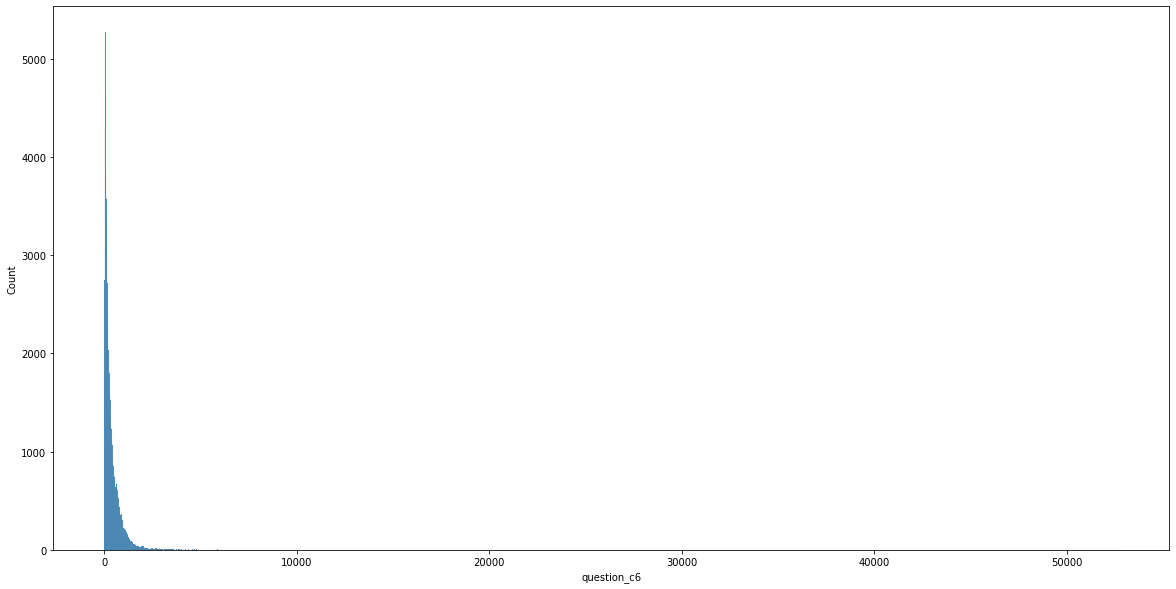

In [8]:
max = df_to_eda['question_c6'].str.len().max()
min = df_to_eda['question_c6'].str.len().min()
median = df_to_eda['question_c6'].str.len().median()
mean = df_to_eda['question_c6'].str.len().mean()

print('As questões vão de %d à %d caracteres por questão' % (min, max))
print('O valor mediano e médio de caracteres por questão é de %d e de %d, respectivamente.' %
(median, mean))

fig, ax = plt.subplots(figsize=(20, 10))

sns.histplot(df_to_eda['question_c6'].str.len(), ax = ax)

Curiosamente temos muitas sentenças de tamanho 1. Provavelmente esses itens não representam nada e precisam ser excluídos.

In [9]:
df_to_eda['question_c6'].astype("str").apply(len).sort_values()

60203        2
62497        2
85839        2
13705        2
32833        2
         ...  
58817    50759
79472    52546
42658    52546
23050    52546
69735    52706
Name: question_c6, Length: 86841, dtype: int64

In [10]:
# looking at those items with sentence length of 1
df_to_eda[df_to_eda["question_c6"].astype("str").apply(len) == 1]

,question_c6,bulletType,school_step


In [11]:
# filtering length 1 sentence size items
df_c1 = df_to_eda[df_to_eda["question_c6"].astype("str").apply(len) != 1]


In [12]:
# let's check the length of these sentences again
df_c1['question_c6'].astype("str").apply(len).sort_values()


60203        2
62497        2
85839        2
13705        2
32833        2
         ...  
58817    50759
79472    52546
42658    52546
23050    52546
69735    52706
Name: question_c6, Length: 86841, dtype: int64

In [14]:
df_c1["sentence_len"] = df_c1["question_c6"].astype("str").apply(len)

In [15]:
df_c1

,question_c6,bulletType,school_step,sentence_len
0,"['base', 'conhecimentos', 'sobre', 'compositor...",2,Fundamental II,468
1,"['achar', 'número', 'somado', 'igual', 'invers...",2,Fundamental II,87
2,"['complete', 'espaços', 'abaixo', 'artigos', '...",4,Fundamental II,583
3,"['chuva', 'ácida', 'fenômeno', 'provocado', 'p...",2,Fundamental II,131
4,"['anexe', 'nesse', 'espaço', 'foto', 'ilustraç...",4,Fundamental I,50
...,...,...,...,...
86836,"['leia', 'reportagem', 'responda', 'questãosob...",2,Fundamental I,133
86837,"['responder', 'questão', 'leia', 'trecho', 'co...",2,Médio & Pré-Vestibular,1984
86838,"['pais', 'surgiu', 'skate']",2,Fundamental II,27
86839,"['machos', 'fêmeas', 'mosquitos', 'gênero', 'a...",2,Fundamental II,509
